# 최 하단부 plt에 한국어 표시하기 위한 부분

In [2]:
# 단계 1: 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (51.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 폰트 적용
plt.rc('font', family='NanumBarunGothic') 

# 마운트, 기본 피쳐 불러오기

In [2]:
# df_mecab_adj의 클러스터링

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 전처리 시작

In [4]:
# 데이터 불러오기

df_mecab_adj = pd.read_csv('/content/drive/MyDrive/Code/소희/adj_count_102_2.csv', encoding='utf-8',index_col=0)

df_mecab_adj.head()


,keyword,adj_102
0,168계단,맛없다 힘들다 인상깊다 빠르다 귀엽다 손쉽다 아쉽다 예쁘다 알차다 아름답다 착하다 ...
1,25의용단,편하다 작다 인상깊다 괜찮다 어둡다 빠르다 밝다 부끄럽다 크다 넓다 맛있다 아쉽다...
2,40계단 문화관,맛없다 힘들다 눈부시다 인상깊다 어둡다 빠르다 귀엽다 아쉽다 예쁘다 아름답다 알차다...
3,40계단 문화관광테마거리,맛없다 힘들다 인상깊다 어둡다 빠르다 귀엽다 아쉽다 색다르다 예쁘다 알차다 아름답다...
4,60년전통 할매국밥,맛없다 힘들다 빠르다 귀엽다 아쉽다 예쁘다 알차다 아름답다 착하다 싱겁다 멋있다 ...


In [5]:
# mecab_adj2 컬럼을 mecab_adj로 변경하고 덮어쓰기

df_mecab_adj = df_mecab_adj.rename(columns={'adj_102':'mecab_adj'})
df_mecab_adj.head()



,keyword,mecab_adj
0,168계단,맛없다 힘들다 인상깊다 빠르다 귀엽다 손쉽다 아쉽다 예쁘다 알차다 아름답다 착하다 ...
1,25의용단,편하다 작다 인상깊다 괜찮다 어둡다 빠르다 밝다 부끄럽다 크다 넓다 맛있다 아쉽다...
2,40계단 문화관,맛없다 힘들다 눈부시다 인상깊다 어둡다 빠르다 귀엽다 아쉽다 예쁘다 아름답다 알차다...
3,40계단 문화관광테마거리,맛없다 힘들다 인상깊다 어둡다 빠르다 귀엽다 아쉽다 색다르다 예쁘다 알차다 아름답다...
4,60년전통 할매국밥,맛없다 힘들다 빠르다 귀엽다 아쉽다 예쁘다 알차다 아름답다 착하다 싱겁다 멋있다 ...


In [ ]:
df_mecab_adj['mecab_adj'] = df_mecab_adj['mecab_adj'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')

df_mecab_adj.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,keyword,mecab_adj
0,168계단,있다 없다 있다 없다 비싸다 멀다...
1,25의용단,좋다 없다 없다 없다 없다 같다 ...
2,40계단 문화관,늦다 좋다 좋다 없다 같다 비싸다...
3,40계단 문화관광테마거리,수많다 있다 없다 없다 없다 있다...
4,60년전통 할매국밥,맛있다 없다 싫다 없다 맛있다 좋...


In [6]:
# mecab_adj에서 각 단어가 몇 번 나오는지 세기

from collections import Counter

count = Counter(df_mecab_adj['mecab_adj'].str.split(expand=True).stack())

count.most_common()

[('많다', 557),
 ('작다', 542),
 ('크다', 539),
 ('맛있다', 539),
 ('넓다', 534),
 ('높다', 528),
 ('괜찮다', 523),
 ('길다', 521),
 ('힘들다', 518),
 ('아쉽다', 515),
 ('예쁘다', 515),
 ('편하다', 515),
 ('늦다', 511),
 ('재밌다', 502),
 ('짧다', 501),
 ('맑다', 496),
 ('빠르다', 485),
 ('깊다', 472),
 ('이쁘다', 471),
 ('귀엽다', 460),
 ('재미있다', 451),
 ('멋지다', 445),
 ('알차다', 443),
 ('즐겁다', 442),
 ('멋있다', 440),
 ('밝다', 429),
 ('비싸다', 428),
 ('아름답다', 415),
 ('엄청나다', 414),
 ('부드럽다', 389),
 ('야무지다', 380),
 ('맛나다', 379),
 ('새롭다', 373),
 ('붉다', 339),
 ('반갑다', 320),
 ('맛없다', 318),
 ('부럽다', 311),
 ('흐리다', 306),
 ('고맙다', 300),
 ('진하다', 281),
 ('배부르다', 277),
 ('뜨겁다', 271),
 ('낫다', 271),
 ('어둡다', 257),
 ('놀랍다', 245),
 ('시끄럽다', 243),
 ('정신없다', 227),
 ('낯설다', 222),
 ('착하다', 220),
 ('드넓다', 212),
 ('알맞다', 212),
 ('푸르다', 210),
 ('차갑다', 206),
 ('느리다', 205),
 ('곱다', 204),
 ('색다르다', 204),
 ('습하다', 202),
 ('슬프다', 201),
 ('예뿌다', 194),
 ('가파르다', 192),
 ('정겹다', 181),
 ('환하다', 180),
 ('파랗다', 180),
 ('인상깊다', 179),
 ('배고프다', 177),
 ('드물다', 175),
 ('옳다', 174)

In [ ]:
# mecab_adj에서 1글자인 단어를 삭제

df_mecab_adj['mecab_adj'] = df_mecab_adj['mecab_adj'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 1]))

df_mecab_adj.head()

,keyword,mecab_adj
0,168계단,있다 없다 있다 없다 비싸다 멀다 있다 많다 있다 있다 있다 있다 많다 많다 무섭다...
1,25의용단,좋다 없다 없다 없다 없다 같다 있다 있다 어렵다 있다 좋다 같다 있다 좋다 크다 ...
2,40계단 문화관,늦다 좋다 좋다 없다 같다 비싸다 좋다 크다 크다 있다 없다 없다 있다 이쁘다 좋다...
3,40계단 문화관광테마거리,수많다 있다 없다 없다 없다 있다 깊다 있다 있다 좋다 멋지다 있다 없다 있다 있다...
4,60년전통 할매국밥,맛있다 없다 싫다 없다 맛있다 좋다 맛있다 아쉬우다 무겁다 없다 맛있다 재밌다 맛있...


17:27 중복단어 삭제 안 하고 돌리기

In [ ]:
# mecab_adj 컬럼에서 집합을 이용해 중복되는 단어를 삭제

df_mecab_adj['mecab_adj'] = df_mecab_adj['mecab_adj'].apply(lambda x: set(x.split()))

df_mecab_adj.head()

,keyword,mecab_adj
0,168계단,"{적다, 그렇다, 궂다, 귀찮다, 갑작스럽다, 무섭다, 습하다, 덥다, 세다, 조그..."
1,25의용단,"{그렇다, 정겹다, 빨갛다, 없다, 젊다, 깊다, 빠르다, 곱다, 동그렇다, 이쁘다..."
2,40계단 문화관,"{적다, 흥겹다, 궂다, 그렇다, 귀찮다, 젊다, 깊다, 무섭다, 언짢다, 덥다, ..."
3,40계단 문화관광테마거리,"{적다, 저렇다, 궂다, 그렇다, 귀찮다, 깊다, 잘다, 갑작스럽다, 무섭다, 언짢..."
4,60년전통 할매국밥,"{적다, 저렇다, 그렇다, 귀찮다, 깊다, 싱겁다, 덥다, 습하다, 드넓다, 세다,..."


In [ ]:
# { 를 [ 로 }를 ]로 바꾸기

df_mecab_adj['mecab_adj'] = df_mecab_adj['mecab_adj'].apply(lambda x: str(x).replace('{', '[').replace('}', ']'))

df_mecab_adj.head()



1132
(566, 2)


In [ ]:
print(df_mecab_adj.size)
print(df_mecab_adj.shape)

1132
(566, 2)


# 벡터화 준비

In [7]:
# konlpy 설치

!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 465 kB 64.7 MB/s 


In [8]:
from konlpy.tag import Okt
okt = Okt()

In [9]:
# df_mecab_adj의 mecab_adj를 벡터화

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_mecab_adj['mecab_adj'])

tfidf_matrix.shape


(566, 95)

# K-Means

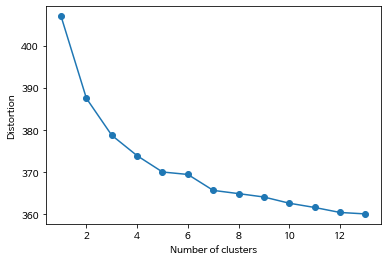

In [ ]:
## K-means 클러스터링의 중심점이 움직이지 않을 때까지 fit 하여 최적의 클러스터 수 구하기

# from sklearn.cluster import KMeans

# distortions = []

# for i in range(1, 14):

#     km = KMeans(

#         n_clusters=i, init='k-means++', n_init=10, max_iter=300,

#         tol=1e-04, random_state=42

#     )

#     km.fit(tfidf_matrix)

#     distortions.append(km.inertia_)

# # elbow method를 이용해 최적의 클러스터 수 구하기
    
# import matplotlib.pyplot as plt

# plt.plot(range(1, 14), distortions, marker='o')

# plt.xlabel('Number of clusters')

# plt.ylabel('Distortion')

# plt.show()

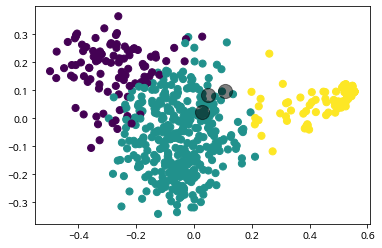

In [15]:
# n_clusters= 클러스터 갯 수, init='k-means++', n_init= ???, max_iter= 최초 시작할 때 이동시킬 중심점, tol=1e-04, random_state= 난수


km = KMeans(

    n_clusters=3, init='k-means++', n_init=563, max_iter=300, tol=1e-04, random_state=42

)

y_km = km.fit_predict(tfidf_matrix)

# 클러스터링 결과를 시각화

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y_km, s=50, cmap='viridis')

# km.cluster_centers_ 표시

centers = km.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()



In [ ]:
# 클러스터링 결과를 데이터프레임에 추가

df_mecab_adj['cluster'] = y_km

df_mecab_adj.head()

# 클러스터링 결과를 csv 파일로 저장

df_mecab_adj.to_csv('df_mecab_adj.csv', index=False)

# 클러스터링 결과를 엑셀 파일로 저장

df_mecab_adj.to_excel('df_mecab_adj.xlsx', index=False)

In [ ]:
# 중심점을 구하기

km.cluster_centers_


array([[0.00062495, 0.0260593 , 0.05763165, ..., 0.00235774, 0.00064261,
        0.02335945],
       [0.0008603 , 0.03915042, 0.02539992, ..., 0.0138442 , 0.00497995,
        0.03935638],
       [0.        , 0.        , 0.04369132, ..., 0.00364155, 0.        ,
        0.01291467]])

In [ ]:
# 각 클러스터의 중심 단어

import numpy as np

order_centroids = km.cluster_centers_.argsort()[:, ::-1]

terms = tfidf_vectorizer.get_feature_names()

for i in range(3):

    print("Cluster %d:" % i, end='')

    for ind in order_centroids[i, :10]:

        print(' %s' % terms[ind], end='')

    print()

Cluster 0: 그렇다 늦다 길다 르다 재밌다 예쁘다 아쉽다 쉽다 이쁘다 귀엽다
Cluster 1: 쩔다 손색없다 더럽다 동그랗다 그립다 쓸데없다 갑작스럽다 따갑다 희다 세차다
Cluster 2: 있다 좋다 같다 없다 많다 크다 맛있다 높다 넓다 작다


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 하단 무시

# K-Medroids

In [ ]:
! pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.2 MB/s 


In [ ]:
# 위 df_mecab_adj의 mecab_adj를 KMedoids로 클러스터링

from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=2, random_state=0).fit(tfidf_matrix)

kmedoids.labels_


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,

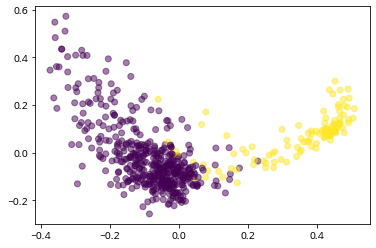

In [ ]:
# 위 결과를 시각화

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmedoids.labels_, alpha=0.5)

plt.show()